# Data Exploration & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
clev_data = pd.read_csv('processed.cleveland.csv', sep="\t")
#clev_data = pd.read_csv('processed.hungarian.csv', sep="\t")
#clev_data = pd.read_csv('processed.switzerland.csv', sep=",")
#clev_data = pd.read_csv('processed.va.csv', sep=",")
clev_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
clev_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

In [ ]:
clev_data.iloc[0]

age          63
sex           1
cp            1
trestbps    145
chol        233
fbs           1
restecg       2
thalach     150
exang         0
oldpeak     2.3
slope         3
ca          0.0
thal        6.0
num           0
Name: 0, dtype: object

In [ ]:
clev_data.shape

(303, 14)

## Binarization of target values

In [ ]:
clev_data["num"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
clev_data["num"].replace({2:1, 3:1, 4:1}, inplace=True)
clev_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
clev_data["num"].value_counts()

0    164
1    139
Name: num, dtype: int64

## Checking inadequate values

In [ ]:
clev_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [ ]:
clev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
print(clev_data["slope"].unique())
print(clev_data["ca"].unique()) #
print(clev_data["thal"].unique()) #
print(clev_data["trestbps"].unique())
print(clev_data["fbs"].unique())
print(clev_data["oldpeak"].unique())

[3. 2. 1.]
['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[1. 0.]
[2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


In [ ]:
#print("Number of ? for slope:\t", sum(clev_data["slope"].values=="?"))
print("Number of ? for ca:\t", sum(clev_data["ca"].values=="?"))
print("Number of ? for thal:\t", sum(clev_data["thal"].values=="?"))
#print("Number of ? for trestbps:\t", sum(clev_data["thal"].values=="?"))
#print("Number of ? for fbs:\t", sum(clev_data["thal"].values=="?"))
#print("Number of ? for oldpeak:\t", sum(clev_data["oldpeak"].values=="?"))

Number of ? for ca:	 4
Number of ? for thal:	 2


## Dropping

In [ ]:
#data_dropped = clev_data[(clev_data["ca"]!="?")&(clev_data["thal"]!="?")]
data_dropped = clev_data[(clev_data["ca"]!="?")&(clev_data["thal"]!="?")&(clev_data["slope"]!="?")]
data_dropped

/opt/venv/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


## Plotting

In [ ]:
clev_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


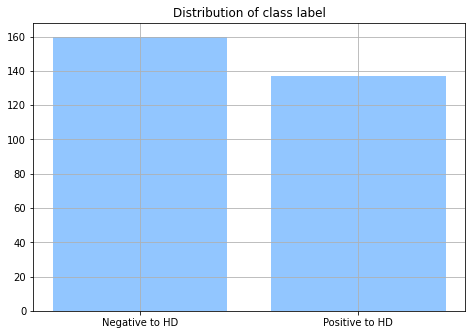

In [ ]:
class_label = data_dropped["num"]
class_label = class_label.replace({0:"Negative to HD", 1:"Positive to HD"})

plt.style.use("seaborn-pastel")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(class_label.unique(), class_label.value_counts())
ax.set_title("Distribution of class label")
ax.set_xticks(class_label.unique())

ax.grid(b=True)


<AxesSubplot:title={'center':'Distribution of num label by sex'}, xlabel='sex'>

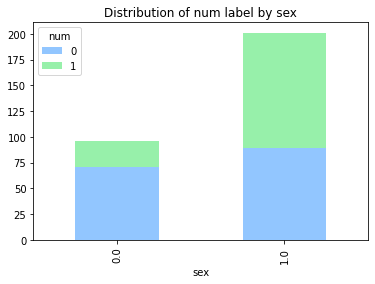

In [ ]:
#sex_by_class_label = data_dropped.groupby("sex").num.value_counts()
sex_by_class_label = data_dropped.groupby("sex").num.value_counts()
sex_by_class_label.unstack().plot(kind="bar", stacked=True, title="Distribution of num label by sex")

<AxesSubplot:title={'center':'Distribution of num label by age'}, xlabel='age'>

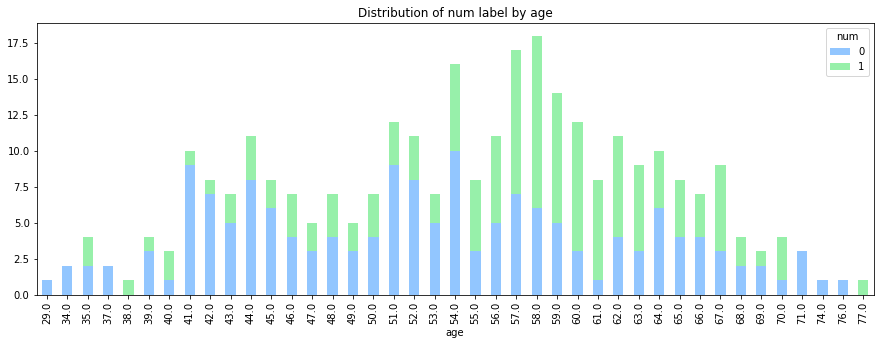

In [ ]:
by_age = data_dropped.groupby(["age"]).num.value_counts()
by_age.unstack().plot(kind="bar", stacked=True, figsize=(15,5), title="Distribution of num label by age" )

     |████████████████████████████████| 283 kB 13.3 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
/opt/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


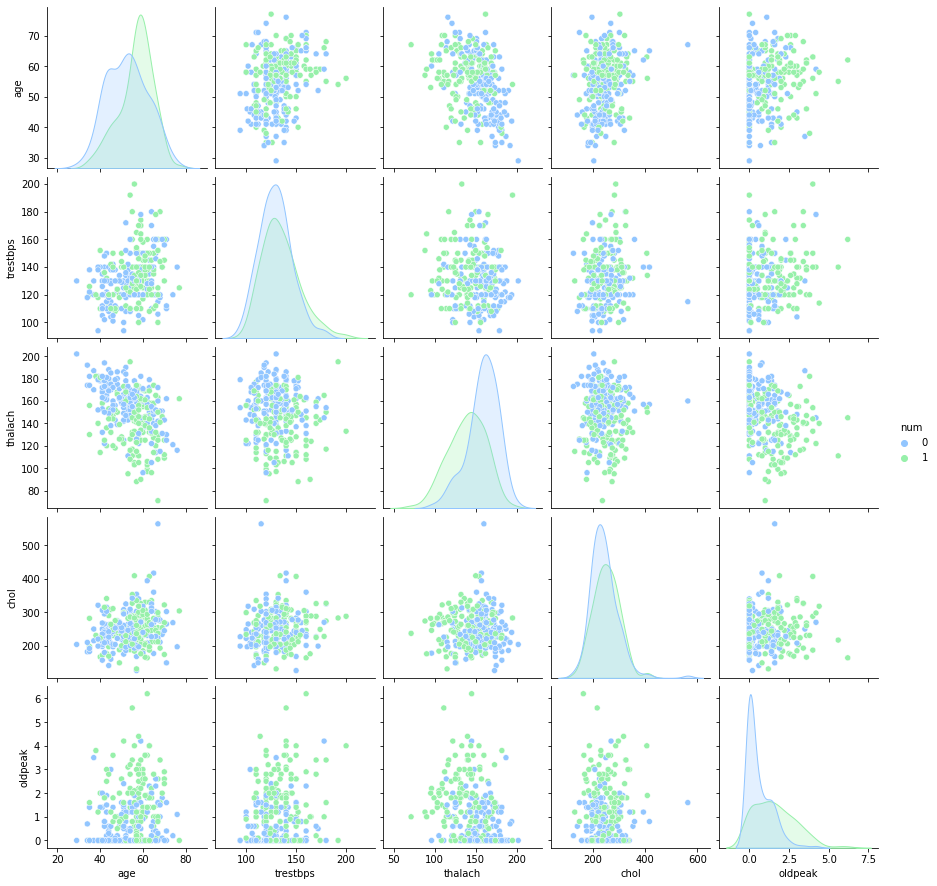

In [ ]:
!pip install seaborn
import seaborn as sns
sns.pairplot(data_dropped[["age", "trestbps","thalach","chol","oldpeak", "num"]], hue="num",size=2.5)

## Outliers

Text(0.5, 1.0, 'oldpeak')

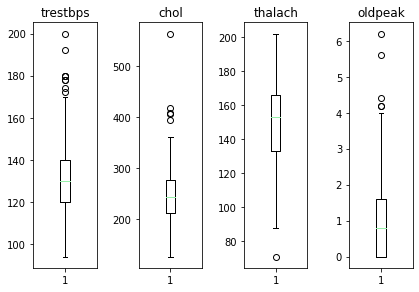

In [ ]:
fig, ax = plt.subplots(1,4)
plt.tight_layout()

ax[0].boxplot(data_dropped["trestbps"])
ax[0].set_title("trestbps")

ax[1].boxplot(data_dropped["chol"])
ax[1].set_title("chol")

ax[2].boxplot(data_dropped["thalach"])
ax[2].set_title("thalach")

ax[3].boxplot(data_dropped["oldpeak"])
ax[3].set_title("oldpeak")



# Correlated Features

In [ ]:
corr = data_dropped.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.424052


<AxesSubplot:>

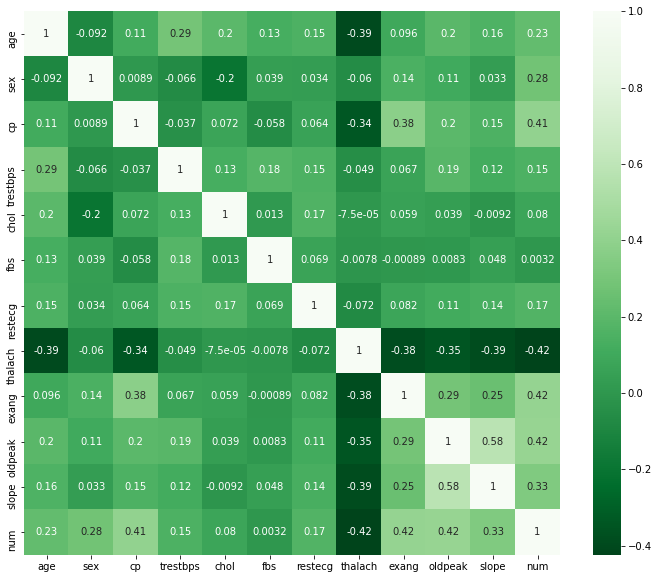

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap = plt.cm.Greens_r)

## Normalization

In [ ]:
from sklearn import preprocessing

x = data_dropped.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
newdatanorm = pd.DataFrame(x_scaled, columns=data_dropped.columns)

In [ ]:
newdatanorm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00,1.0
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00,1.0
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00,1.0
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00,1.0


In [ ]:
norm_corr = newdatanorm.corr()
norm_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


<AxesSubplot:>

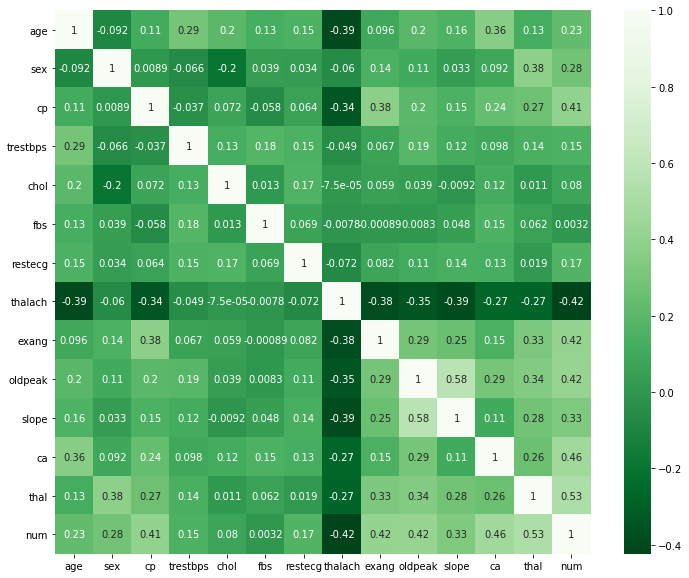

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(norm_corr, annot=True, cmap = plt.cm.Greens_r)

In [ ]:
newdatanorm.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [ ]:
#newdatanorm['num'] = newdatanorm['num'].astype(np.int64)

In [ ]:
newdatanorm.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [ ]:
XX = newdatanorm.drop('num', axis = 1)
yy = newdatanorm['num']

In [ ]:
XX

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00


In [ ]:
yy

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
292    1.0
293    1.0
294    1.0
295    1.0
296    1.0
Name: num, Length: 297, dtype: float64

In [ ]:
yy.value_counts()

0.0    160
1.0    137
Name: num, dtype: int64

# Classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=0)

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn = knn.fit(XX_train, yy_train)
ypredknn = knn.predict(XX_test)
ypredknn

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0.])

In [ ]:
print(metrics.classification_report(yy_test, ypredknn))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80        48
         1.0       0.80      0.67      0.73        42

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.76        90



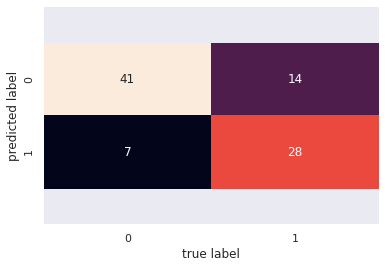

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(yy_test, ypredknn)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#scoring = 'f1_macro'
scoring = 'accuracy'
cv = 10
#svm_kernel = 'linear'
#svm_kernel = 'poly'
svm_kernel = 'rbf'
n_trees = 1000

[Text(168.37325581395348, 205.35999999999999, 'X[2] <= 0.833\nentropy = 0.995\nsamples = 207\nvalue = [112, 95]'),
 Text(72.02093023255814, 181.2, 'X[0] <= 0.573\nentropy = 0.695\nsamples = 107\nvalue = [87, 20]'),
 Text(31.144186046511628, 157.04, 'X[12] <= 0.875\nentropy = 0.387\nsamples = 66\nvalue = [61, 5]'),
 Text(15.572093023255814, 132.88, 'X[9] <= 0.573\nentropy = 0.139\nsamples = 51\nvalue = [50, 1]'),
 Text(7.786046511627907, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(23.35813953488372, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.71627906976744, 132.88, 'X[4] <= 0.233\nentropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(38.93023255813954, 108.72, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(54.50232558139535, 108.72, 'X[11] <= 0.167\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(46.71627906976744, 84.56, 'X[3] <= 0.198\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(38.93023255813954, 60.400000000000006, 'X[

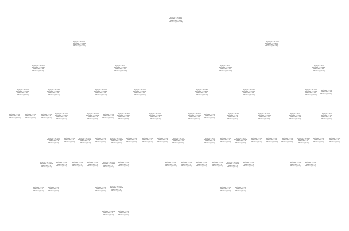

In [ ]:
clff = tree.DecisionTreeClassifier(random_state=0, max_depth=8, criterion='entropy') # gini is the default one
clff = clff.fit(XX_train, yy_train)
tree.plot_tree(clff.fit(XX_train, yy_train)) 

In [ ]:
ypred = clff.predict(XX_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print(metrics.classification_report(yy_test, ypred))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        48
         1.0       0.71      0.71      0.71        42

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90



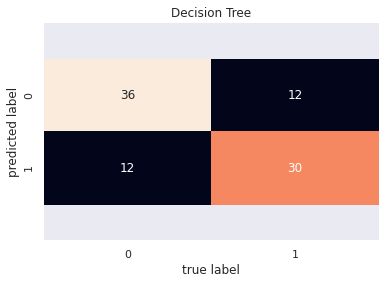

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat_tree = confusion_matrix(yy_test, ypred)
sns.heatmap(mat_tree.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Decision Tree')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 


# show the true/false positives/negatives

## Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=n_trees, max_depth=2, criterion='entropy',
                        random_state=0)
forest.fit(XX_train, yy_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=1000,
                       random_state=0)

In [ ]:
ypredbag = forest.predict(XX_test)
print(metrics.classification_report(yy_test, ypredbag))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        48
         1.0       0.88      0.71      0.79        42

    accuracy                           0.82        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



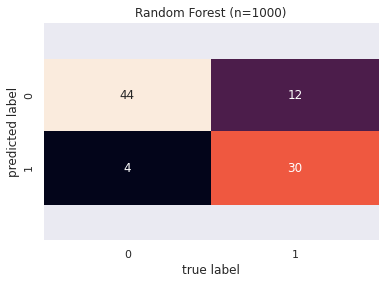

In [ ]:
mat_forest = confusion_matrix(yy_test, ypredbag)
sns.heatmap(mat_forest.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Random Forest (n=1000)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

# Accuracy for 1   : 0.72
# Accuracy for 2   : 0.62
# Accuracy for 10  : 0.81
# Accuracy for 100 : 0.88 (4 misclassifications) =>
# => Best performance, however, we can get the same result with only 43 trees

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', gamma='auto', probability=True) 
svm_rbf = SVC(kernel='rbf', gamma='auto', probability=True)
svm_poly = SVC(kernel='poly', gamma='auto', probability=True)

svm_linear.fit(XX_train, yy_train)
svm_rbf.fit(XX_train, yy_train)
svm_poly.fit(XX_train, yy_train)

SVC(gamma='auto', kernel='poly', probability=True)

In [ ]:
ypredsvm_linear = svm_linear.predict(XX_test)
ypredsvm_poly = svm_poly.predict(XX_test)
ypredsvm_rbf = svm_rbf.predict(XX_test)

In [ ]:
print('linear')
print(metrics.classification_report(yy_test, ypredsvm_linear))
print('poly')
print(metrics.classification_report(yy_test, ypredsvm_poly))
print('rbf')
print(metrics.classification_report(yy_test, ypredsvm_rbf))

linear
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85        48
         1.0       0.89      0.74      0.81        42

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

poly
              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80        48
         1.0       0.95      0.48      0.63        42

    accuracy                           0.74        90
   macro avg       0.82      0.73      0.72        90
weighted avg       0.81      0.74      0.72        90

rbf
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        48
         1.0       0.91      0.71      0.80        42

    accuracy                           0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90



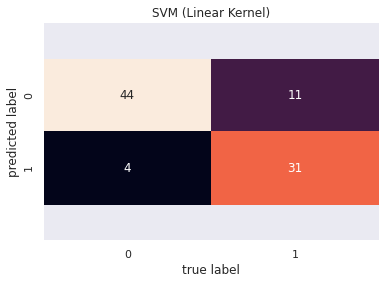

In [ ]:
mat_svm_linear = confusion_matrix(yy_test, ypredsvm_linear)
sns.heatmap(mat_svm_linear.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (Linear Kernel)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

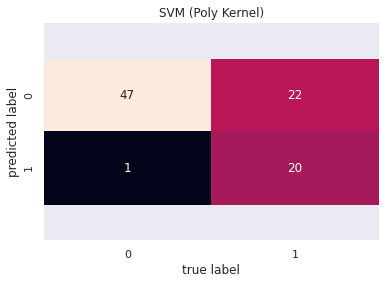

In [ ]:
mat_svm_poly = confusion_matrix(yy_test, ypredsvm_poly)
sns.heatmap(mat_svm_poly.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (Poly Kernel)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

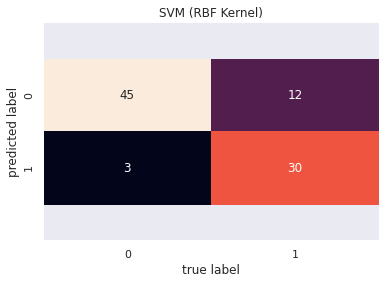

In [ ]:
mat_svm_rbf = confusion_matrix(yy_test, ypredsvm_rbf)
sns.heatmap(mat_svm_rbf.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (RBF Kernel)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
 neuro = MLPClassifier(alpha=1, max_iter=100)

 neuro.fit(XX_train, yy_train)

/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=1, max_iter=100)

In [ ]:
ypredneuro = neuro.predict(XX_test)
print(metrics.classification_report(yy_test, ypredneuro))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        48
         1.0       0.89      0.79      0.84        42

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



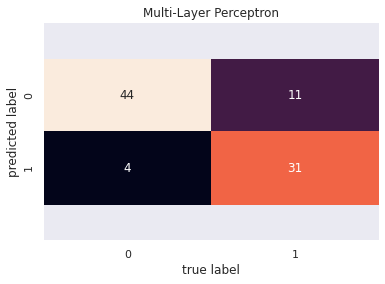

In [ ]:
mat_neuro = confusion_matrix(yy_test, ypredsvm_linear)
sns.heatmap(mat_neuro.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Multi-Layer Perceptron')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()   
lda_clf.fit(XX_train, yy_train)

LinearDiscriminantAnalysis()

In [ ]:
ypredlda = lda_clf.predict(XX_test)
ypredlda


array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1.])

In [ ]:
print(metrics.classification_report(yy_test, ypredlda))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        48
         1.0       0.88      0.71      0.79        42

    accuracy                           0.82        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



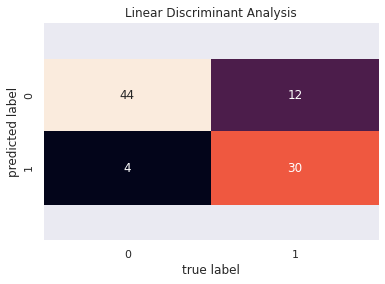

In [ ]:
mat_lda = confusion_matrix(yy_test, ypredlda)
sns.heatmap(mat_lda.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Linear Discriminant Analysis')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(XX_train, yy_train)

LogisticRegression()

In [ ]:
ypredlr = lr_clf.predict(XX_test)
ypredlr

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1.])

In [ ]:
print(metrics.classification_report(yy_test, ypredlr))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87        48
         1.0       0.91      0.74      0.82        42

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



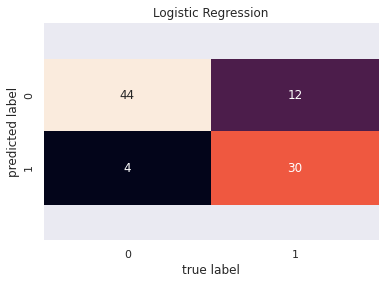

In [ ]:
mat_lr = confusion_matrix(yy_test, ypredlda)
sns.heatmap(mat_lr.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Logistic Regression')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## k-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### K-Nearest Neighbors CV Score

In [ ]:
from sklearn.model_selection import cross_val_predict
knn_cv = KNeighborsClassifier(3)
ypredknn_cv = cross_val_predict(knn_cv, XX, yy, cv=10)
ypredknn_cv

array([0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1.

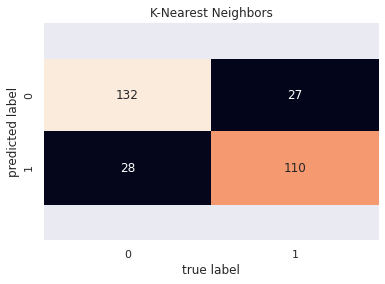

In [ ]:
knn_cv_mat = confusion_matrix(yy, ypredknn_cv)
sns.heatmap(knn_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('K-Nearest Neighbors')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
#knnscores = cross_val_score(knn, XX, yy, cv=cv, scoring=scoring)
knnscores_acc = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='accuracy')
knnscores_f1m = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='f1_macro')
knnscores_f1w = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='f1_weighted')
knnscores_auc = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='roc_auc')
knnscores_precision = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='precision')
knnscores_recall = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='recall')
knnscores_f1 = cross_val_score(knn_cv, XX, yy, cv=cv, scoring='f1')

In [ ]:
print('KNN Accuracy: ', knnscores_acc)
print('KNN F1 Macro: ', knnscores_f1m)
print('KNN F1 Weighted: ', knnscores_f1w)
print('KNN AUC: ', knnscores_auc)
print('KNN Precision: ', knnscores_precision)
print('KNN Recall: ', knnscores_recall)
print('KNN F1 Score: ', knnscores_f1)

KNN Accuracy:  [0.83333333 0.83333333 0.83333333 0.83333333 0.76666667 0.8
 0.76666667 0.82758621 0.72413793 0.93103448]
KNN F1 Macro:  [0.83164983 0.83314794 0.83164983 0.83314794 0.76640712 0.79910714
 0.76430976 0.82424242 0.70707071 0.93028846]
KNN F1 Weighted:  [0.83277217 0.83351872 0.83277217 0.83277716 0.76692621 0.79821429
 0.76588103 0.82675026 0.71438523 0.93103448]
KNN AUC:  [0.85491071 0.91071429 0.86607143 0.90848214 0.75446429 0.83705357
 0.84151786 0.93509615 0.77884615 0.92788462]
KNN Precision:  [0.84615385 0.8        0.84615385 0.76470588 0.73333333 0.72222222
 0.76923077 0.83333333 0.77777778 0.92307692]
KNN Recall:  [0.78571429 0.85714286 0.78571429 0.92857143 0.78571429 0.92857143
 0.71428571 0.76923077 0.53846154 0.92307692]
KNN F1 Score:  [0.81481481 0.82758621 0.81481481 0.83870968 0.75862069 0.8125
 0.74074074 0.8        0.63636364 0.92307692]


### Decision Tree CV Score

In [ ]:
tree_cv = tree.DecisionTreeClassifier(random_state=0, max_depth=8, criterion='entropy') # gini is the default one
ypred_dt_cv = cross_val_predict(tree_cv, XX, yy, cv=10)
ypred_dt_cv

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

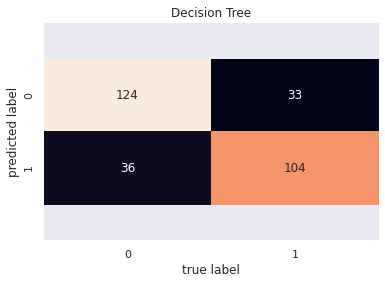

In [ ]:
dt_cv_mat = confusion_matrix(yy, ypred_dt_cv)
sns.heatmap(dt_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Decision Tree')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
treescores_acc = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='accuracy')
treescores_f1m = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='f1_macro')
treescores_auc = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='roc_auc')
treescores_f1w = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='f1_weighted')
treescores_precision = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='precision')
treescores_recall = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='recall')
treescores_f1 = cross_val_score(tree_cv, XX, yy, cv=cv, scoring='f1')


In [ ]:
print('Decision Tree Accuracy: ', treescores_acc)
print('Decision Tree F1 Macro: ', treescores_f1m)
print('Decision Tree F1 Weighted: ', treescores_f1w)
print('Decision Tree AUC: ', treescores_auc)
print('Decision Tree Precision: ', treescores_precision)
print('Decision Tree Recall: ', treescores_recall)
print('Decision Tree F1 Score: ', treescores_f1)

Decision Tree Accuracy:  [0.8        0.66666667 0.9        0.9        0.76666667 0.7
 0.66666667 0.79310345 0.75862069 0.72413793]
Decision Tree F1 Macro:  [0.79910714 0.66666667 0.89988877 0.89988877 0.76430976 0.6969697
 0.66517857 0.77105263 0.74782609 0.71568627]
Decision Tree F1 Weighted:  [0.8        0.66666667 0.90011123 0.8996663  0.76588103 0.69494949
 0.66369048 0.7784029  0.75322339 0.72075727]
Decision Tree AUC:  [0.79910714 0.69196429 0.92633929 0.89955357 0.76339286 0.74776786
 0.6875     0.79086538 0.76442308 0.68990385]
Decision Tree Precision:  [0.78571429 0.625      0.86666667 0.82352941 0.76923077 0.63157895
 0.61111111 1.         0.8        0.72727273]
Decision Tree Recall:  [0.78571429 0.71428571 0.92857143 1.         0.71428571 0.85714286
 0.78571429 0.53846154 0.61538462 0.61538462]
Decision Tree F1 Score:  [0.78571429 0.66666667 0.89655172 0.90322581 0.74074074 0.72727273
 0.6875     0.7        0.69565217 0.66666667]


### Random Forest CV Score

In [ ]:
forest_cv = RandomForestClassifier(n_estimators=n_trees, max_depth=2, criterion='entropy',
                        random_state=0)
ypred_forest_cv = cross_val_predict(forest_cv, XX, yy, cv=10)
ypred_forest_cv

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

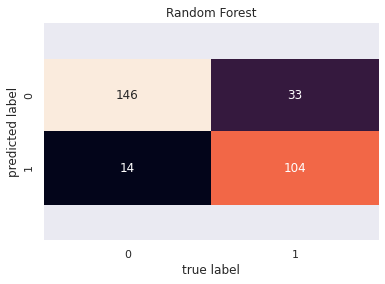

In [ ]:
forest_cv_mat = confusion_matrix(yy, ypred_forest_cv)
sns.heatmap(forest_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Random Forest')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
#forestscores = cross_val_score(forest_cv, X, y, cv=5, scoring='accuracy')
#forestscores = cross_val_score(forest_cv, XX, yy, cv=cv, scoring=scoring)
forestscores_acc = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='accuracy')
forestscores_f1m = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='f1_macro')
forestscores_f1w = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='f1_weighted')
forestscores_auc = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='roc_auc')
forestscores_precision = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='precision')
forestscores_recall = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='recall')
forestscores_f1 = cross_val_score(forest_cv, XX, yy, cv=cv, scoring='f1')

In [ ]:
print('Random Forest Accuracy: ', forestscores_acc)
print('Random Forest F1 Macro: ', forestscores_f1m)
print('Random Forest F1 Weighted: ', forestscores_f1w)
print('Random Forest AUC: ', forestscores_auc)
print('Random Forest Precision: ', forestscores_precision)
print('Random Forest Recall: ', forestscores_recall)
print('Random Forest F1 Score: ', forestscores_f1)

Random Forest Accuracy:  [0.86666667 0.83333333 0.86666667 0.96666667 0.86666667 0.76666667
 0.8        0.86206897 0.75862069 0.82758621]
Random Forest F1 Macro:  [0.86425339 0.82857143 0.86425339 0.96662959 0.86425339 0.76640712
 0.79166667 0.85784314 0.74782609 0.81987578]
Random Forest F1 Weighted:  [0.86546003 0.83047619 0.86546003 0.96670374 0.86546003 0.76692621
 0.79444444 0.86037863 0.75322339 0.82373099]
Random Forest AUC:  [0.89732143 0.91071429 0.93303571 0.98214286 0.91071429 0.85267857
 0.88392857 0.92307692 0.86057692 0.95192308]
Random Forest Precision:  [0.91666667 0.90909091 0.91666667 0.93333333 0.91666667 0.73333333
 0.9        0.90909091 0.8        0.9       ]
Random Forest Recall:  [0.78571429 0.71428571 0.78571429 1.         0.78571429 0.78571429
 0.64285714 0.76923077 0.61538462 0.69230769]
Random Forest F1 Score:  [0.84615385 0.8        0.84615385 0.96551724 0.84615385 0.75862069
 0.75       0.83333333 0.69565217 0.7826087 ]


### Support Vector Machine CV Score

In [ ]:
svm_linear_cv = SVC(kernel='linear', gamma='auto', probability=True) 
svm_rbf_cv = SVC(kernel='rbf', gamma='auto', probability=True)
svm_poly_cv = SVC(kernel='poly', gamma='auto', probability=True)

In [ ]:
ypred_svm_linear_cv = cross_val_predict(svm_linear_cv, XX, yy, cv=10)
ypred_svm_linear_cv

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

In [ ]:
ypred_svm_poly_cv = cross_val_predict(svm_poly_cv, XX, yy, cv=10)
ypred_svm_poly_cv

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [ ]:
ypred_svm_rbf_cv = cross_val_predict(svm_rbf_cv, XX, yy, cv=10)
ypred_svm_rbf_cv

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

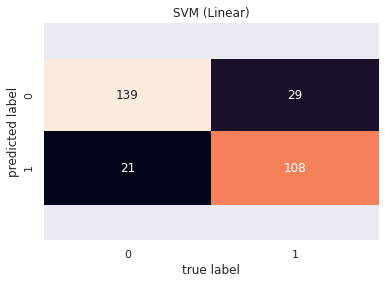

In [ ]:
svm_linear_cv_mat = confusion_matrix(yy, ypred_svm_linear_cv)
sns.heatmap(svm_linear_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (Linear)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

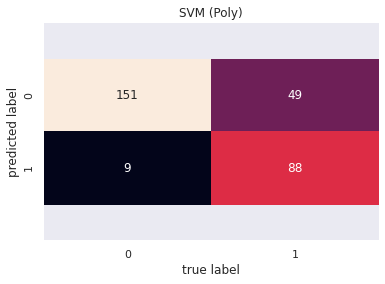

In [ ]:
svm_poly_cv_mat = confusion_matrix(yy, ypred_svm_poly_cv)
sns.heatmap(svm_poly_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (Poly)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

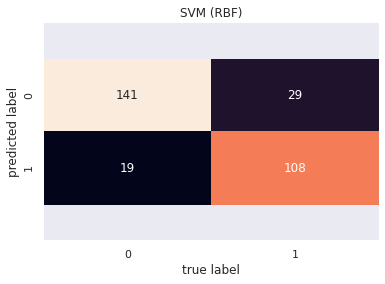

In [ ]:
svm_rbf_cv_mat = confusion_matrix(yy, ypred_svm_rbf_cv)
sns.heatmap(svm_rbf_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM (RBF)')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
svm_linear_scores_acc = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='accuracy')
svm_linear_scores_f1m = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='f1_macro')
svm_linear_scores_f1w = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='f1_weighted')
svm_linear_scores_auc = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='roc_auc')
svm_linear_scores_precision = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='precision')
svm_linear_scores_recall = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='recall')
svm_linear_scores_f1 = cross_val_score(svm_linear_cv, XX, yy, cv=cv, scoring='f1')

svm_poly_scores_acc = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='accuracy')
svm_poly_scores_f1m = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='f1_macro')
svm_poly_scores_f1w = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='f1_weighted')
svm_poly_scores_auc = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='roc_auc')
svm_poly_scores_precision = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='precision')
svm_poly_scores_recall = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='recall')
svm_poly_scores_f1 = cross_val_score(svm_poly_cv, XX, yy, cv=cv, scoring='f1')

svm_rbf_scores_acc = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='accuracy')
svm_rbf_scores_f1m = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='f1_macro')
svm_rbf_scores_f1w = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='f1_weighted')
svm_rbf_scores_auc = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='roc_auc')
svm_rbf_scores_precision = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='precision')
svm_rbf_scores_recall = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='recall')
svm_rbf_scores_f1 = cross_val_score(svm_rbf_cv, XX, yy, cv=cv, scoring='f1')

In [ ]:
print('SVM Linear Accuray: ', svm_linear_scores_acc)
print('SVM Linear F1 Macro: ', svm_linear_scores_f1m)
print('SVM Linear F1 Weighted: ', svm_linear_scores_f1w)
print('SVM Linear AUC: ', svm_linear_scores_auc)
print('SVM Linear Precision: ', svm_linear_scores_precision)
print('SVM Linear Recall: ', svm_linear_scores_recall)
print('SVM Linear F1 Score: ', svm_linear_scores_f1)

print('SVM Polynomial Accuray: ', svm_poly_scores_acc)
print('SVM Polynomial F1 Macro: ', svm_poly_scores_f1m)
print('SVM Polynomial F1 Weighted: ', svm_poly_scores_f1w)
print('SVM Polynomial AUC: ', svm_poly_scores_auc)
print('SVM Polynomial Precision: ', svm_poly_scores_precision)
print('SVM Polynomial Recall: ', svm_poly_scores_recall)
print('SVM Polynomial F1 Score: ', svm_poly_scores_f1)

print('SVM RBF Accuray: ', svm_rbf_scores_acc)
print('SVM Polynomial F1 Macro: ', svm_rbf_scores_f1m)
print('SVM RBF F1 Weighted: ', svm_rbf_scores_f1w)
print('SVM RBF AUC: ', svm_rbf_scores_auc)
print('SVM RBF Precision: ', svm_rbf_scores_precision)
print('SVM RBF Recall: ', svm_rbf_scores_recall)
print('SVM RBF F1 Score: ', svm_rbf_scores_f1)

SVM Linear Accuray:  [0.86666667 0.83333333 0.8        0.93333333 0.8        0.76666667
 0.8        0.89655172 0.75862069 0.86206897]
SVM Linear F1 Macro:  [0.86425339 0.83164983 0.79910714 0.93303571 0.79910714 0.76640712
 0.79638009 0.89454545 0.74782609 0.85784314]
SVM Linear F1 Weighted:  [0.86546003 0.83277217 0.8        0.93333333 0.8        0.76588802
 0.79819005 0.89605016 0.75322339 0.86037863]
SVM Linear AUC:  [0.91517857 0.91071429 0.91964286 0.94196429 0.89285714 0.86160714
 0.84375    0.96634615 0.86538462 0.91346154]
SVM Linear Precision:  [0.91666667 0.84615385 0.78571429 0.92857143 0.78571429 0.70588235
 0.83333333 0.91666667 0.8        0.90909091]
SVM Linear Recall:  [0.78571429 0.78571429 0.78571429 0.92857143 0.78571429 0.85714286
 0.71428571 0.84615385 0.61538462 0.76923077]
SVM Linear F1 Score:  [0.84615385 0.81481481 0.78571429 0.92857143 0.78571429 0.77419355
 0.76923077 0.88       0.69565217 0.83333333]
SVM Polynomial Accuray:  [0.86666667 0.8        0.9        

### Neural Networks CV Score

In [ ]:
neuro_cv = MLPClassifier(alpha=1, max_iter=100)
ypred_mlp_cv = cross_val_predict(neuro_cv, XX, yy, cv=10)
ypred_mlp_cv

/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

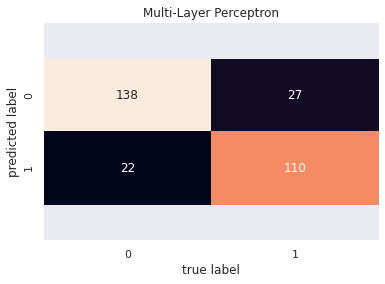

In [ ]:
mlp_cv_mat = confusion_matrix(yy, ypred_mlp_cv)
sns.heatmap(mlp_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Multi-Layer Perceptron')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
#neuroscores = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring=scoring)
neuroscores_acc = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='accuracy')
neuroscores_f1m = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='f1_macro')
neuroscores_f1w = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='f1_weighted')
neuroscores_auc = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='roc_auc')
neuroscores_precision = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='precision')
neuroscores_recall = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='recall')
neuroscores_f1 = cross_val_score(neuro_cv, XX, yy, cv=cv, scoring='f1')

/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

In [ ]:
print('MLP Accuracy: ', neuroscores_acc)
print('MLP F1 Macro: ', neuroscores_f1m)
print('MLP F1 Weighted: ', neuroscores_f1w)
print('MLP AUC: ', neuroscores_auc)
print('MLP Precision: ', neuroscores_precision)
print('MLP Recall: ', neuroscores_recall)
print('MLP F1 Score: ', neuroscores_f1)

MLP Accuracy:  [0.86666667 0.83333333 0.73333333 0.96666667 0.8        0.76666667
 0.83333333 0.89655172 0.75862069 0.82758621]
MLP F1 Macro:  [0.89714286 0.83164983 0.73333333 0.96662959 0.79910714 0.76640712
 0.79638009 0.89454545 0.74782609 0.85784314]
MLP F1 Weighted:  [0.86546003 0.8        0.76692621 0.96670374 0.8        0.8
 0.79819005 0.82799819 0.75322339 0.86037863]
MLP AUC:  [0.91517857 0.90625    0.91964286 0.95535714 0.91517857 0.84375
 0.84375    0.96153846 0.87019231 0.94230769]
MLP Precision:  [1.         0.78571429 0.78571429 0.93333333 0.78571429 0.75
 0.84615385 0.91666667 0.8        0.90909091]
MLP Recall:  [0.78571429 0.78571429 0.78571429 1.         0.78571429 0.85714286
 0.71428571 0.84615385 0.61538462 0.76923077]
MLP F1 Score:  [0.88       0.81481481 0.75862069 0.96551724 0.78571429 0.77419355
 0.81481481 0.84615385 0.69565217 0.83333333]


### Linear Discriminant Analysis CV Score

In [ ]:
lda_clf_cv = LinearDiscriminantAnalysis() 

ypred_lda_cv = cross_val_predict(lda_clf_cv, XX, yy, cv=10)
ypred_lda_cv

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

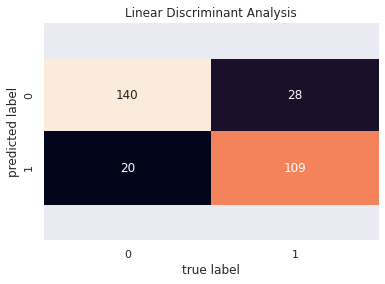

In [ ]:
lda_cv_mat = confusion_matrix(yy, ypred_lda_cv)
sns.heatmap(lda_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Linear Discriminant Analysis')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
#neuroscores = cross_val_score(neuro, XX, yy, cv=cv, scoring=scoring)
ldascores_acc = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='accuracy')
ldascores_f1m = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='f1_macro')
ldascores_f1w = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='f1_weighted')
ldascores_auc = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='roc_auc')
ldascores_precision = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='precision')
ldascores_recall = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='recall')
ldascores_f1 = cross_val_score(lda_clf_cv, XX, yy, cv=cv, scoring='f1')

In [ ]:
print('LDA Accuracy: ', ldascores_acc)
print('LDA F1 Macro: ', ldascores_f1m)
print('LDA F1 Weighted: ', ldascores_f1w)
print('LDA AUC: ', ldascores_auc)
print('LDA Precision: ', ldascores_precision)
print('LDA Recall: ', ldascores_recall)
print('LDA F1 Score: ', ldascores_f1)

LDA Accuracy:  [0.86666667 0.86666667 0.8        0.96666667 0.8        0.76666667
 0.8        0.89655172 0.75862069 0.86206897]
LDA F1 Macro:  [0.86425339 0.86425339 0.79910714 0.96662959 0.79910714 0.76640712
 0.79638009 0.89454545 0.74782609 0.85784314]
LDA F1 Weighted:  [0.86546003 0.86546003 0.8        0.96670374 0.8        0.76588802
 0.79819005 0.89605016 0.75322339 0.86037863]
LDA AUC:  [0.91071429 0.90178571 0.92410714 0.94642857 0.91517857 0.85714286
 0.85267857 0.97596154 0.85576923 0.89903846]
LDA Precision:  [0.91666667 0.91666667 0.78571429 0.93333333 0.78571429 0.70588235
 0.83333333 0.91666667 0.8        0.90909091]
LDA Recall:  [0.78571429 0.78571429 0.78571429 1.         0.78571429 0.85714286
 0.71428571 0.84615385 0.61538462 0.76923077]
LDA F1 Score:  [0.84615385 0.84615385 0.78571429 0.96551724 0.78571429 0.77419355
 0.76923077 0.88       0.69565217 0.83333333]


## Logistic Regression CV Score

In [ ]:
#lr_clf_cv = LogisticRegression()
#ypred_lr_cv = cross_val_predict(lr_clf_cv, XX, yy, cv=10)
#ypred_lr_cv

In [ ]:
#lr_cv_mat = confusion_matrix(yy, ypred_lr_cv)
#sns.heatmap(lr_cv_mat.T, annot=True, fmt='d', cbar=False)
#plt.xlabel('true label')
#plt.ylabel('predicted label');
#plt.title('Linear Regression')
#b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
#t -= 0.5 # Subtract 0.5 from the top
#plt.ylim(b, t) # update the ylim(bottom, top) values
#plt.show() 

In [ ]:
#lrscores_acc = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='accuracy')
#lrscores_f1m = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='f1_macro')
#lrscores_f1w = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='f1_weighted')
#lrscores_auc = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='roc_auc')
#lrscores_precision = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='precision')
#lrscores_recall = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='recall')
#lrscores_f1 = cross_val_score(lr_clf_cv, XX, yy, cv=cv, scoring='f1')

In [ ]:
#print('Logistic Regression Accuracy: ', lrscores_acc)
#print('Logistic Regression F1 Macro: ', lrscores_f1m)
#print('Logistic Regression F1 Weighted: ', lrscores_f1w)
#print('Logistic Regression AUC: ', lrscores_auc)
#print('Logistic Regression Precision: ', lrscores_precision)
#print('Logistic Regression Recall: ', lrscores_recall)
#print('Logistic Regression F1 Score: ', lrscores_f1)

# Compute mean of the results

In [ ]:
# KNN
#print("%s of k-nearest neighbors: %0.2f (+/- %0.2f)" % (scoring, knnscores.mean(), knnscores.std() * 1.96))
print("Accuracy of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_acc.mean(), knnscores_acc.std() * 1.96))
print("F1_macro of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_f1m.mean(), knnscores_f1m.std() * 1.96))
print("F1_weighted of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_f1w.mean(), knnscores_f1w.std() * 1.96))
print("ROC AUC of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_auc.mean(), knnscores_auc.std() * 1.96))
print("Precision of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_precision.mean(), knnscores_precision.std() * 1.96))
print("Recall of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_recall.mean(), knnscores_recall.std() * 1.96))
print("F1-score of k-nearest neighbors: %0.2f (+/- %0.2f)" % (knnscores_f1.mean(), knnscores_f1.std() * 1.96))

Accuracy of k-nearest neighbors: 0.81 (+/- 0.10)
F1_macro of k-nearest neighbors: 0.81 (+/- 0.11)
F1_weighted of k-nearest neighbors: 0.81 (+/- 0.11)
ROC AUC of k-nearest neighbors: 0.86 (+/- 0.11)
Precision of k-nearest neighbors: 0.80 (+/- 0.11)
Recall of k-nearest neighbors: 0.80 (+/- 0.22)
F1-score of k-nearest neighbors: 0.80 (+/- 0.14)


In [ ]:
# Decision Tree
#print("%s of decision tree: %0.2f (+/- %0.2f)" % (scoring, treescores.mean(), treescores.std() * 1.96))
print("Accuracy of decision tree: %0.2f (+/- %0.2f)" % (treescores_acc.mean(), treescores_acc.std() * 1.96))
print("F1-macro of decision tree: %0.2f (+/- %0.2f)" % (treescores_f1m.mean(), treescores_f1m.std() * 1.96))
print("F1-weighted of decision tree: %0.2f (+/- %0.2f)" % (treescores_f1w.mean(), treescores_f1w.std() * 1.96))
print("ROC AUC of decision tree: %0.2f (+/- %0.2f)" % (treescores_auc.mean(), treescores_auc.std() * 1.96))
print("precision of decision tree: %0.2f (+/- %0.2f)" % (treescores_precision.mean(), treescores_precision.std() * 1.96))
print("Recall of decision tree: %0.2f (+/- %0.2f)" % (treescores_recall.mean(), treescores_recall.std() * 1.96))
print("F1-score of decision tree: %0.2f (+/- %0.2f)" % (treescores_f1.mean(), treescores_f1.std() * 1.96))

Accuracy of decision tree: 0.77 (+/- 0.16)
F1-macro of decision tree: 0.76 (+/- 0.16)
F1-weighted of decision tree: 0.76 (+/- 0.16)
ROC AUC of decision tree: 0.78 (+/- 0.15)
precision of decision tree: 0.76 (+/- 0.23)
Recall of decision tree: 0.76 (+/- 0.27)
F1-score of decision tree: 0.75 (+/- 0.16)


In [ ]:
# Random Forest
#print("%s of forest with %d trees: %0.2f (+/- %0.2f)" % (scoring, n_trees, forestscores.mean(), forestscores.std() * 1.96))
print("Accuracy of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_acc.mean(), forestscores_acc.std() * 1.96))
print("F1-macro of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_f1m.mean(), forestscores_f1m.std() * 1.96))
print("F1-weighted of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_f1w.mean(), forestscores_f1w.std() * 1.96))
print("ROC AUC of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_auc.mean(), forestscores_auc.std() * 1.96))
print("Precision of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_precision.mean(), forestscores_precision.std() * 1.96))
print("Recall of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_recall.mean(), forestscores_recall.std() * 1.96))
print("F1-score of forest with %d trees: %0.2f (+/- %0.2f)" % (n_trees, forestscores_f1.mean(), forestscores_f1.std() * 1.96))

Accuracy of forest with 1000 trees: 0.84 (+/- 0.11)
F1-macro of forest with 1000 trees: 0.84 (+/- 0.12)
F1-weighted of forest with 1000 trees: 0.84 (+/- 0.11)
ROC AUC of forest with 1000 trees: 0.91 (+/- 0.07)
Precision of forest with 1000 trees: 0.88 (+/- 0.12)
Recall of forest with 1000 trees: 0.76 (+/- 0.20)
F1-score of forest with 1000 trees: 0.81 (+/- 0.14)


In [ ]:
#SVM
#print("%s of linear SVM: %0.2f (+/- %0.2f)" % (scoring, svm_linear_scores.mean(), svmscores.std() * 1.96))
print("Accuracy of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_acc.mean(), svm_linear_scores_acc.std() * 1.96))
print("F1-macro of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_f1m.mean(), svm_linear_scores_f1m.std() * 1.96))
print("F1-weighted of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_f1w.mean(), svm_linear_scores_f1w.std() * 1.96))
print("ROC AUC of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_auc.mean(), svm_linear_scores_auc.std() * 1.96))
print("Precision of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_precision.mean(), svm_linear_scores_precision.std() * 1.96))
print("Recall of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_recall.mean(), svm_linear_scores_recall.std() * 1.96))
print("F1-score of linear SVM: %0.2f (+/- %0.2f)" % (svm_linear_scores_f1.mean(), svm_linear_scores_f1.std() * 1.96))

#print("%s of poly SVM: %0.2f (+/- %0.2f)" % (scoring, svm_poly_scores.mean(), svmscores.std() * 1.96))
print("\nAccuracy of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_acc.mean(), svm_poly_scores_acc.std() * 1.96))
print("F1-macro of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_f1m.mean(), svm_poly_scores_f1m.std() * 1.96))
print("F1-weighted of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_f1w.mean(), svm_poly_scores_f1w.std() * 1.96))
print("ROC AUC of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_auc.mean(), svm_linear_scores_auc.std() * 1.96))
print("Precision of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_precision.mean(), svm_poly_scores_precision.std() * 1.96))
print("Recall of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_recall.mean(), svm_poly_scores_recall.std() * 1.96))
print("F1-score of poly SVM: %0.2f (+/- %0.2f)" % (svm_poly_scores_f1.mean(), svm_poly_scores_f1.std() * 1.96))

#print("%s of rbf SVM: %0.2f (+/- %0.2f)" % (scoring, svm_rbf_scores.mean(), svmscores.std() * 1.96))
print("\nAccuracy of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_acc.mean(), svm_rbf_scores_acc.std() * 1.96))
print("F1-macro of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_f1m.mean(), svm_rbf_scores_f1m.std() * 1.96))
print("F1-weighted of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_f1w.mean(), svm_rbf_scores_f1w.std() * 1.96))
print("ROC AUC of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_auc.mean(), svm_rbf_scores_auc.std() * 1.96))
print("Precision of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_precision.mean(), svm_rbf_scores_precision.std() * 1.96))
print("Recall of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_recall.mean(), svm_rbf_scores_recall.std() * 1.96))
print("F1-score of rbf SVM: %0.2f (+/- %0.2f)" % (svm_rbf_scores_f1.mean(), svm_rbf_scores_f1.std() * 1.96))
#print("%s of %s SVM: %0.2f (+/- %0.2f)" % (scoring, svm_kernel,svmscores.mean(), svmscores.std() * 1.96))

Accuracy of linear SVM: 0.83 (+/- 0.11)
F1-macro of linear SVM: 0.83 (+/- 0.11)
F1-weighted of linear SVM: 0.83 (+/- 0.11)
ROC AUC of linear SVM: 0.90 (+/- 0.07)
Precision of linear SVM: 0.84 (+/- 0.14)
Recall of linear SVM: 0.79 (+/- 0.16)
F1-score of linear SVM: 0.81 (+/- 0.12)

Accuracy of poly SVM: 0.80 (+/- 0.16)
F1-macro of poly SVM: 0.78 (+/- 0.21)
F1-weighted of poly SVM: 0.79 (+/- 0.20)
ROC AUC of poly SVM: 0.91 (+/- 0.07)
Precision of poly SVM: 0.92 (+/- 0.17)
Recall of poly SVM: 0.64 (+/- 0.38)
F1-score of poly SVM: 0.73 (+/- 0.34)

Accuracy of rbf SVM: 0.84 (+/- 0.13)
F1-macro of rbf SVM: 0.83 (+/- 0.13)
F1-weighted of rbf SVM: 0.84 (+/- 0.13)
ROC AUC of rbf SVM: 0.91 (+/- 0.07)
Precision of rbf SVM: 0.86 (+/- 0.16)
Recall of rbf SVM: 0.79 (+/- 0.22)
F1-score of rbf SVM: 0.82 (+/- 0.16)


In [ ]:
#MLP
#print("%s of MLP: %0.2f (+/- %0.2f)" % (scoring, svmscores.mean(), svmscores.std() * 1.96))
print("Accuracy of MLP: %0.2f (+/- %0.2f)" % (neuroscores_acc.mean(), neuroscores_acc.std() * 1.96))
print("F1-macro of MLP: %0.2f (+/- %0.2f)" % (neuroscores_f1m.mean(), neuroscores_f1m.std() * 1.96))
print("F1-weighted of MLP: %0.2f (+/- %0.2f)" % (neuroscores_f1w.mean(), neuroscores_f1w.std() * 1.96))
print("ROC AUC of MLP: %0.2f (+/- %0.2f)" % (neuroscores_auc.mean(), neuroscores_auc.std() * 1.96))
print("Precision of MLP: %0.2f (+/- %0.2f)" % (neuroscores_precision.mean(), neuroscores_precision.std() * 1.96))
print("Recall of MLP: %0.2f (+/- %0.2f)" % (neuroscores_recall.mean(), neuroscores_recall.std() * 1.96))
print("F1-score of MLP: %0.2f (+/- %0.2f)" % (neuroscores_f1.mean(), neuroscores_f1.std() * 1.96))

Accuracy of MLP: 0.83 (+/- 0.13)
F1-macro of MLP: 0.83 (+/- 0.14)
F1-weighted of MLP: 0.82 (+/- 0.11)
ROC AUC of MLP: 0.91 (+/- 0.08)
Precision of MLP: 0.85 (+/- 0.15)
Recall of MLP: 0.79 (+/- 0.18)
F1-score of MLP: 0.82 (+/- 0.14)


In [ ]:
#LDA
print("Accuracy of LDA: %0.2f (+/- %0.2f)" % (ldascores_acc.mean(), ldascores_acc.std() * 1.96))
print("F1-macro of LDA: %0.2f (+/- %0.2f)" % (ldascores_f1m.mean(), ldascores_f1m.std() * 1.96))
print("F1-weighted of LDA: %0.2f (+/- %0.2f)" % (ldascores_f1w.mean(), ldascores_f1w.std() * 1.96))
print("ROC AUC of LDA: %0.2f (+/- %0.2f)" % (ldascores_auc.mean(), ldascores_auc.std() * 1.96))
print("Precision of LDA: %0.2f (+/- %0.2f)" % (ldascores_precision.mean(), ldascores_precision.std() * 1.96))
print("Recall of LDA: %0.2f (+/- %0.2f)" % (ldascores_recall.mean(), ldascores_recall.std() * 1.96))
print("F1-score of LDA: %0.2f (+/- %0.2f)" % (ldascores_f1.mean(), ldascores_f1.std() * 1.96))

Accuracy of LDA: 0.84 (+/- 0.12)
F1-macro of LDA: 0.84 (+/- 0.12)
F1-weighted of LDA: 0.84 (+/- 0.12)
ROC AUC of LDA: 0.90 (+/- 0.08)
Precision of LDA: 0.85 (+/- 0.15)
Recall of LDA: 0.79 (+/- 0.18)
F1-score of LDA: 0.82 (+/- 0.14)


In [ ]:
#LRegression
#print("Accuracy of LR: %0.2f (+/- %0.2f)" % (lrscores_acc.mean(), lrscores_acc.std() * 1.96))
#print("F1-macro of LR: %0.2f (+/- %0.2f)" % (lrscores_f1m.mean(), lrscores_f1m.std() * 1.96))
#print("F1-weighted of LR: %0.2f (+/- %0.2f)" % (lrscores_f1w.mean(), lrscores_f1w.std() * 1.96))
#print("ROC AUC of LR: %0.2f (+/- %0.2f)" % (lrscores_auc.mean(), lrscores_auc.std() * 1.96))
#print("Precision of LR: %0.2f (+/- %0.2f)" % (lrscores_precision.mean(), lrscores_precision.std() * 1.96))
#print("Recall of LR: %0.2f (+/- %0.2f)" % (lrscores_recall.mean(), lrscores_recall.std() * 1.96))
#print("F1-score of LR: %0.2f (+/- %0.2f)" % (lrscores_f1.mean(), lrscores_f1.std() * 1.96))

## ROC AUC CURVE Plotting

In [ ]:
### The multiplotting of ROC AUC curves were mainly inspired (with adoption of some parts of the codes from):
### https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot​
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [knn_cv, tree_cv, forest_cv, svm_rbf_cv, neuro_cv, lda_clf_cv]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(XX_train, yy_train)
    yproba = model.predict_proba(XX_test)[::,1]
    
    fpr, tpr, _ = roc_curve(yy_test,  yproba)
    auc = roc_auc_score(yy_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
result_table

,fpr,tpr,auc
classifiers,,,
KNeighborsClassifier,"[0.0, 0.08333333333333333, 0.14583333333333334...","[0.0, 0.4523809523809524, 0.6666666666666666, ...",0.788690
DecisionTreeClassifier,"[0.0, 0.20833333333333334, 0.25, 1.0]","[0.0, 0.7142857142857143, 0.7142857142857143, ...",0.747024
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.020833333333333332, 0.020833...","[0.0, 0.023809523809523808, 0.3571428571428571...",0.866567
SVC,"[0.0, 0.0, 0.0, 0.020833333333333332, 0.020833...","[0.0, 0.023809523809523808, 0.3809523809523809...",0.901290
MLPClassifier,"[0.0, 0.0, 0.0, 0.020833333333333332, 0.020833...","[0.0, 0.023809523809523808, 0.3333333333333333...",0.894841
LinearDiscriminantAnalysis,"[0.0, 0.0, 0.0, 0.020833333333333332, 0.020833...","[0.0, 0.023809523809523808, 0.4761904761904761...",0.896329


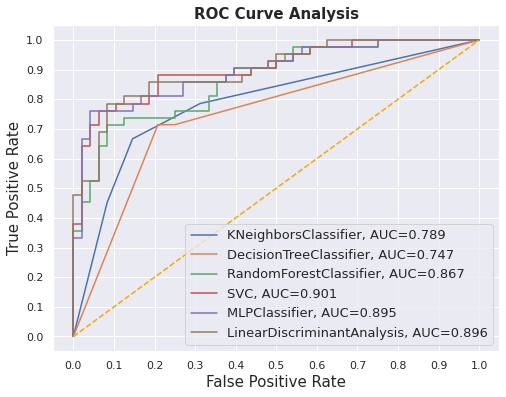

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             #label="{}".format(i))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## SVM poly ROC AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [svm_poly_cv]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(XX_train, yy_train)
    yproba = model.predict_proba(XX_test)[::,1]
    
    fpr, tpr, _ = roc_curve(yy_test,  yproba)
    auc = roc_auc_score(yy_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

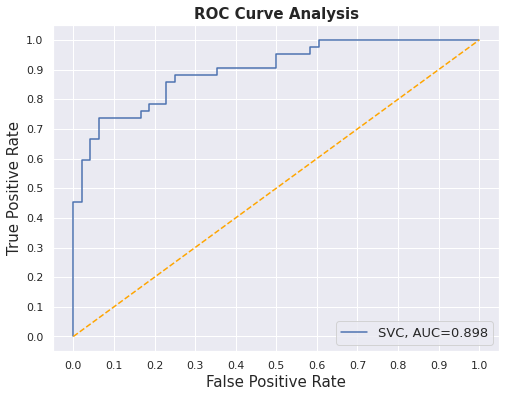

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             #label="{}".format(i))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## SVM Linear ROC AUC

In [ ]:
classifiers = [svm_linear_cv]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(XX_train, yy_train)
    yproba = model.predict_proba(XX_test)[::,1]
    
    fpr, tpr, _ = roc_curve(yy_test,  yproba)
    auc = roc_auc_score(yy_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

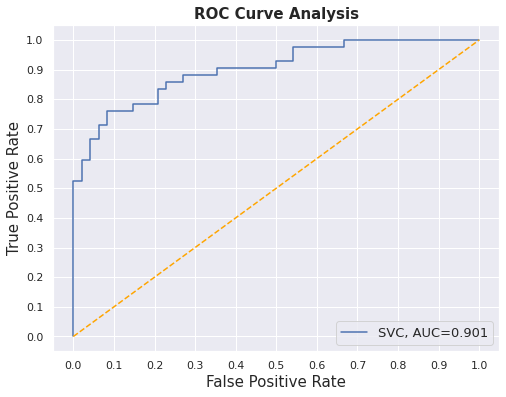

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             #label="{}".format(i))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Deployment Of Best Performing Model on the Independent Test Set

## Train best model with whole dataset

In [ ]:
X = newdatanorm.drop('num', axis = 1)
y = newdatanorm['num']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

final_lda_clf = LinearDiscriminantAnalysis() 
final_lda_clf.fit(X, y)  

LinearDiscriminantAnalysis()

## Exporting Model

In [ ]:
import pickle

In [ ]:
FOLDER_PATH = "deploy/"

In [ ]:
trained_model_filename = FOLDER_PATH + "trained_model_dataset.pickle"

In [ ]:
data_to_save = final_lda_clf
file_path = trained_model_filename

In [ ]:
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

## Load the model

In [ ]:
final_lda_clf

LinearDiscriminantAnalysis()

In [ ]:
loaded_model = None

In [ ]:
file_path

'deploy/trained_model_dataset.pickle'

In [ ]:
with open(file_path, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [ ]:
loaded_model

LinearDiscriminantAnalysis()

## Make predictions with the loaded model

In [ ]:
#Y_predicted_loaded_model = loaded_model.predict(XX_test)
Y_predicted_loaded_model = cross_val_predict(loaded_model, XX, yy, cv=10)
Y_predicted_loaded_model

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

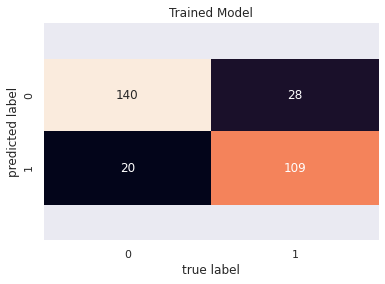

In [ ]:
#confusion_matrix(yy_test, Y_predicted_loaded_model)
predicted_model_cv_mat = confusion_matrix(yy, Y_predicted_loaded_model)
sns.heatmap(predicted_model_cv_mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Trained Model')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [ ]:
#print(metrics.classification_report(yy_test, Y_predicted_loaded_model))

## Load sample data

In [ ]:
#data_to_classify = [57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0]
#data_to_classify = [58,1,2,140,268,0,2,160,0,3.6,3,2,3] # num: 1
#data_to_classify = [60,1,4,130,206,0,2,132,1,2.4,2,2,7] # num: 4
#data_to_classify = [62,0,4,140,268,0,2,160,0,3.6,3,2,3] # num: 3
#data_to_classify = [58,1,3,132,224,0,2,173,0,3.2,1,2,7] # num: 3 
#data_to_classify = [60,1,4,130,206,0,2,132,1,2.4,2,2,7] # num: 4
#data_to_classify = [58,1,2,120,284,0,2,160,0,1.8,2,0,3] # num: 1
#data_to_classify = [50,0,3,120,219,0,0,158,0,1.6,2,0,3] # num: 0
#data_to_classify = [40,1,4,110,167,0,2,114,1,2,2,0,7] # num: 3
#data_to_classify = [56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0] # num: 2
#data_to_classify = [63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0] # num 0
# normalize values: 0.7083333333333334	1	0	0.48113207547169823	0.24429223744292233	1	1	0.6030534351145037	0	0.3709677419354838	1	0	0.75 
data_to_classify = pd.read_csv('to_predict.csv')
data_to_classify = data_to_classify.drop('num', axis = 1)
data_to_classify

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56,1,4,120,100,0,0,120,1,1.5,2,0,7
1,47,1,4,150,226,0,0,98,1,1.5,2,0,7


In [ ]:
colnames = clev_data.columns
colnames = colnames.drop('num').values
print(colnames)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


In [ ]:
#sample = pd.DataFrame(data = [data_to_classify.iloc[0]], columns = colnames)
sample = pd.DataFrame(data = [data_to_classify.iloc[1]], columns = colnames) # from a dataset
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,47.0,1.0,4.0,150.0,226.0,0.0,0.0,98.0,1.0,1.5,2.0,0.0,7.0


## Normalize sample data

In [ ]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [ ]:
data_to_be_norm = data_dropped.copy()
data_to_be_norm['thal'] = data_to_be_norm['thal'].astype(float)
data_to_be_norm['ca'] = data_to_be_norm['ca'].astype(float)

In [ ]:
data_to_be_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [ ]:
sample['age'] = (sample['age'] - data_to_be_norm['age'].min()) / (data_to_be_norm['age'].max() - data_to_be_norm['age'].min())
sample['sex'] = (sample['sex'] - data_to_be_norm['sex'].min()) / (data_to_be_norm['sex'].max() - data_to_be_norm['sex'].min())
sample['cp'] = (sample['cp'] - data_to_be_norm['cp'].min()) / (data_to_be_norm['cp'].max() - data_to_be_norm['cp'].min())
sample['trestbps'] = (sample['trestbps'] - data_to_be_norm['trestbps'].min()) / (data_to_be_norm['trestbps'].max() - data_to_be_norm['trestbps'].min())
sample['chol'] = (sample['chol'] - data_to_be_norm['chol'].min()) / (data_to_be_norm['chol'].max() - data_to_be_norm['chol'].min())
sample['fbs'] = (sample['fbs'] - data_to_be_norm['fbs'].min()) / (data_to_be_norm['fbs'].max() - data_to_be_norm['fbs'].min())
sample['restecg'] = (sample['restecg'] - data_to_be_norm['restecg'].min()) / (data_to_be_norm['restecg'].max() - data_to_be_norm['restecg'].min())
sample['thalach'] = (sample['thalach'] - data_to_be_norm['thalach'].min()) / (data_to_be_norm['thalach'].max() - data_to_be_norm['thalach'].min())
sample['exang'] = (sample['exang'] - data_to_be_norm['exang'].min()) / (data_to_be_norm['exang'].max() - data_to_be_norm['exang'].min())
sample['oldpeak'] = (sample['oldpeak'] - data_to_be_norm['oldpeak'].min()) / (data_to_be_norm['oldpeak'].max() - data_to_be_norm['oldpeak'].min())
sample['slope'] = (sample['slope'] - data_to_be_norm['slope'].min()) / (data_to_be_norm['slope'].max() - data_to_be_norm['slope'].min())
sample['ca'] = (sample['ca'] - data_to_be_norm['ca'].min()) / (data_to_be_norm['ca'].max() - data_to_be_norm['ca'].min())
sample['thal'] = (sample['thal'] - data_to_be_norm['thal'].min()) / (data_to_be_norm['thal'].max() - data_to_be_norm['thal'].min())

In [ ]:
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,0.375,1.0,1.0,0.528302,0.228311,0.0,0.0,0.206107,1.0,0.241935,0.5,0.0,1.0


## Class prediction results

In [ ]:
#prediction = loaded_model.predict(sample)
#prediction = svm_kernel.predict(sample)
#print("The predicted class for one sample is:", prediction[0])
#print("The class for one sample is:", sample)
print("svm_linear: The predicted class for one sample is:", svm_linear.predict(sample)[0])
print("svm_poly: The predicted class for one sample is:", svm_poly.predict(sample)[0])
print("svm_rbf: The predicted class for one sample is:", svm_rbf.predict(sample)[0])
print("neuro: The predicted class for one sample is:", neuro.predict(sample)[0])
print("forest: The predicted class for one sample is:", forest.predict(sample)[0])
print("decision tree: The predicted class for one sample is:", clff.predict(sample)[0])
print("knn: The predicted class for one sample is:", knn.predict(sample)[0])
print("loaded_model: The predicted class for one sample is:", loaded_model.predict(sample)[0])


svm_linear: The predicted class for one sample is: 1.0
svm_poly: The predicted class for one sample is: 1.0
svm_rbf: The predicted class for one sample is: 1.0
neuro: The predicted class for one sample is: 1.0
forest: The predicted class for one sample is: 1.0
decision tree: The predicted class for one sample is: 1.0
knn: The predicted class for one sample is: 1.0
loaded_model: The predicted class for one sample is: 1.0


# Creating a sample dataset from the non-missing value rows in the other datasets (Hungarian, Swiss, VA)

In [ ]:
patients_hung_data = pd.read_csv('processed.hungarian.csv', sep="\t")
df = pd.DataFrame(patients_hung_data)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

patients_swiss_data = pd.read_csv('processed.switzerland.csv', sep=",")
df = pd.DataFrame(patients_swiss_data)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

patients_VA_data = pd.read_csv('processed.va.csv', sep=",")
df = pd.DataFrame(patients_VA_data)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

In [ ]:
patients_hung_data = patients_hung_data[(patients_hung_data["ca"]!="?")&(patients_hung_data["thal"]!="?")&(patients_hung_data["slope"]!="?")]
patients_hung_data

In [ ]:
patients_swiss_data = patients_swiss_data[(patients_swiss_data["ca"]!="?")&(patients_swiss_data["thal"]!="?")&(patients_swiss_data["slope"]!="?")]
patients_swiss_data

In [ ]:
patients_VA_data = patients_VA_data[(patients_VA_data["ca"]!="?")&(patients_VA_data["thal"]!="?")&(patients_VA_data["slope"]!="?")]
patients_VA_data

In [ ]:
to_concatenate = [patients_VA_data, patients_hung_data]
concatenated = pd.concat(to_concatenate)
concatenated

In [ ]:
concatenated.to_csv('to_predict.csv', index = False)

In [ ]:
to_predict = pd.read_csv('to_predict.csv')
to_predict

## Functions for Cross-validation fold-wise

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
def conf_matrix(y_true, y_pred):
    target_labels = np.array(y_true)
    predictions = np.array(y_pred)
    matrix = confusion_matrix(target_labels, predictions)
    return matrix


def metrics(conf_matrix):
    
    tp = conf_matrix[1][1]
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    
    accuracy = (float (tp+tn) / float(tp + tn + fp + fn))
    recall = (tp / float(tp + fn))
    precision = (tp / float(tp + fp))

    return accuracy, recall, precision

In [ ]:

#### Decision Tree
def cls_tree(class_weight, x_train, y_train, x_test, y_test):
    metric_dic = {}
    dt_cls = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 8,
                                class_weight = class_weight,
                                random_state = 0)
    dt_cls.fit(x_train, y_train)
    y_pred_dt = dt_cls.predict(x_test)
    roc_auc = roc_auc_score(y_test, dt_cls.predict_proba(x_test)[:,1])
    conf_matrix_dt = conf_matrix(y_test, y_pred_dt)
    accuracy, recall, precision = metrics(conf_matrix_dt)
    metric_dic['accuracy'] = accuracy
    metric_dic['recall'] = recall
    metric_dic['precision'] = precision
    metric_dic['roc_auc'] = roc_auc  
    
    return metric_dic


In [ ]:
#### Random Forest
def cls_rf(class_weight, x_train, y_train, x_test, y_test):
    metric_dic = {}
    rf_cls = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 2,
                                class_weight = class_weight,
                                random_state = 0)
    rf_cls.fit(x_train, y_train)
    y_pred_rf = rf_cls.predict(x_test)
    roc_auc = roc_auc_score(y_test, rf_cls.predict_proba(x_test)[:,1])
    conf_matrix_rf = conf_matrix(y_test, y_pred_rf)
    accuracy, recall, precision = metrics(conf_matrix_rf)
    metric_dic['accuracy'] = accuracy
    metric_dic['recall'] = recall
    metric_dic['precision'] = precision
    metric_dic['roc_auc'] = roc_auc    
    
    return metric_dic

In [ ]:
#### SVM
def cls_svm(c_val,class_weight,poly_degree,x_train,y_train,x_test,y_test): 
    
    svm_all_metrics = {}
    for kernel in ('poly', 'rbf', 'linear'):
            metric_dic = {}
            svm_cls = svm.SVC(kernel = kernel, gamma = 'scale',
                                     #C = c_val, tol = 1e-1,
                                     #class_weight = class_weight,
                                     probability=True,
                                     random_state = 0)
            svm_cls.fit(x_train, y_train)
            svm_y_pred = svm_cls.predict(x_test)
            roc_auc = roc_auc_score(y_test, svm_cls.predict_proba(x_test)[:,1])
            conf_matrix_svm = conf_matrix(y_test, svm_y_pred)
            accuracy, recall, precision = metrics(conf_matrix_svm)
            metric_dic['accuracy'] = accuracy
            metric_dic['recall'] = recall
            metric_dic['precision'] = precision
            metric_dic['roc_auc'] = roc_auc
            svm_kernel = 'SVM_' + kernel
            svm_all_metrics[svm_kernel] = metric_dic
        
    return svm_all_metrics

In [ ]:
#### K-Nearest Neighbors
def cls_knn(x_train, y_train, x_test, y_test):
    metric_dic = {}
    knn_all_metrics = {}
    knn_cls = KNeighborsClassifier(3)    #'distance uniform'
    knn_cls.fit(x_train, y_train)
    knn_y_pred = knn_cls.predict(x_test)
    roc_auc = roc_auc_score(y_test, knn_cls.predict_proba(x_test)[:,1])
    conf_matrix_knn = conf_matrix(y_test, knn_y_pred)
    accuracy, recall, precision = metrics(conf_matrix_knn)
    metric_dic['accuracy'] = accuracy
    metric_dic['recall'] = recall
    metric_dic['precision'] = precision
    metric_dic['roc_auc'] = roc_auc
    knn_name = '3N'
    knn_all_metrics[knn_name] = metric_dic

    return knn_all_metrics

In [ ]:

#### Linear Discriminant Analysis
def cls_lda(x_train, y_train, x_test, y_test):
    
    metric_dic = {}
    lda_cls = LinearDiscriminantAnalysis()   
    lda_cls.fit(x_train, y_train)
    lda_y_pred = lda_cls.predict(x_test)
    roc_auc = roc_auc_score(y_test, lda_cls.predict_proba(x_test)[:,1])
    conf_matrix_lda = conf_matrix(y_test, lda_y_pred)
    accuracy, recall, precision = metrics(conf_matrix_lda)
    metric_dic['accuracy'] = accuracy
    metric_dic['recall'] = recall
    metric_dic['precision'] = precision
    metric_dic['roc_auc'] = roc_auc 
    
    return metric_dic

In [ ]:

#### Multi-Layer Perceptron
def cls_mlp(x_train, y_train, x_test, y_test):
    metric_dic = {}
    mlp_cls = MLPClassifier(alpha=1, max_iter=100)   
    mlp_cls.fit(x_train, y_train)
    mlp_y_pred = mlp_cls.predict(x_test)
    roc_auc = roc_auc_score(y_test, mlp_cls.predict_proba(x_test)[:,1])
    conf_matrix_mlp = conf_matrix(y_test, mlp_y_pred)
    accuracy, recall, precision = metrics(conf_matrix_mlp)
    metric_dic['accuracy'] = accuracy
    metric_dic['recall'] = recall
    metric_dic['precision'] = precision
    metric_dic['roc_auc'] = roc_auc 
    
    return metric_dic

In [ ]:
n_fold_split = 10
feature = XX.values
y_all = yy.values

In [ ]:
# Results
kf = KFold(n_splits = n_fold_split, random_state = 0, shuffle = True) 
fold_num = 0
results = {}

for train_index, test_index in kf.split(feature):
    fold_num += 1
    print('Fold Number:{}'.format(fold_num))
    
    x_train = np.asarray(list(feature[i] for i in train_index))  
    x_test = np.asarray(list(feature[i] for i in test_index))
    y_train = np.asarray(list(y_all[i] for i in train_index))
    y_test = np.asarray(list(y_all[i] for i in test_index))
    
    metrics_dt = cls_tree(None, x_train, y_train, x_test, y_test)
    metrics_rf = cls_rf(None, x_train, y_train, x_test, y_test)
    metrics_svm = cls_svm(100,None,12,x_train,y_train,x_test,y_test)
    metrics_knn = cls_knn(x_train, y_train, x_test, y_test)
    metrics_lda = cls_lda(x_train, y_train, x_test, y_test)
    metrics_mlp = cls_mlp(x_train, y_train, x_test, y_test)
    
    metric_name = "Fold_"+str(fold_num)
    dt_name = metric_name+"DecisionTree"
    rf_name = metric_name+"RandomForest"
    svm_name_p = metric_name+"SVM poly"
    svm_name_r = metric_name+"SVM rbf"
    svm_name_l = metric_name+"SVM linear"
    knn_name = metric_name+"KNN"
    lda_name = metric_name+"LDA"
    mlp_name = metric_name+"MLP"

    results[dt_name] = metrics_dt
    results[rf_name] = metrics_rf
    results[svm_name_p] = metrics_svm['SVM_poly']
    results[svm_name_r] = metrics_svm['SVM_rbf']
    results[svm_name_l] = metrics_svm['SVM_linear']
    results[knn_name] = metrics_knn
    results[lda_name] = metrics_lda
    results[mlp_name] = metrics_mlp

Fold Number:1
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Fold Number:2
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Fold Number:3
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Fold Number:4
/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't co

In [ ]:
results

{'Fold_1DecisionTree': {'accuracy': 0.7,
  'recall': 0.7142857142857143,
  'precision': 0.6666666666666666,
  'roc_auc': 0.7455357142857143},
 'Fold_1RandomForest': {'accuracy': 0.7666666666666667,
  'recall': 0.5714285714285714,
  'precision': 0.8888888888888888,
  'roc_auc': 0.8482142857142857},
 'Fold_1SVM poly': {'accuracy': 0.7666666666666667,
  'recall': 0.5714285714285714,
  'precision': 0.8888888888888888,
  'roc_auc': 0.8883928571428571},
 'Fold_1SVM rbf': {'accuracy': 0.8,
  'recall': 0.6428571428571429,
  'precision': 0.9,
  'roc_auc': 0.8526785714285714},
 'Fold_1SVM linear': {'accuracy': 0.8,
  'recall': 0.6428571428571429,
  'precision': 0.9,
  'roc_auc': 0.8482142857142857},
 'Fold_1KNN': {'3N': {'accuracy': 0.7666666666666667,
   'recall': 0.5714285714285714,
   'precision': 0.8888888888888888,
   'roc_auc': 0.8102678571428571}},
 'Fold_1LDA': {'accuracy': 0.8,
  'recall': 0.6428571428571429,
  'precision': 0.9,
  'roc_auc': 0.8571428571428572},
 'Fold_1MLP': {'accuracy